# Homework 9 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def jj(w, t):
    # w = [phi, dphi / dt]
    hbar = 1.0545718e-34 # (m^2 kg / s, or Js)
    e = 1.602176565e-19 # Electron charge (C)
    C = 5e-12 # Capacitence (F)
    Ic = 5e-6 # Critical current (A)
    R = 200 # Resistence (Ohm)
    I = 1e-3 # DC current applied (A)
    beta = 2 * e / (hbar*C)
    
    dpdt = w[1]
    
    ddpdt = (I - Ic*np.sin(w[0]) - w[1]*hbar /(2*e*R))*beta
    foo = np.array([dpdt, ddpdt])
    return foo

In [3]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 5/rk2.py'
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    Numerically integrate m first order ODEs using the Runga-Kutta 
      second-order method, where m is an integer greater than zero.

    Inputs
    ----------
    y0:         Array of m initial dependent-variable values
    t0, tf:     Initial and Final independent-variable values
    dt:         Step size for the independent variable
    deriv_func: Function to be numerically integrated

    Output
    ----------
    t:          Array of independent-variable values, one entry for each step
    y:          Array of corresponding dependent-variables values, 
                  first index is step number, 
                  second index is dependent-variable number
    """

    t = np.arange(t0, tf+dt, dt) # starts at t0 and makes steps of size dt
    n_steps = len(t)             # number of steps to get to tf
    m = len(y0)                  # number of dependent variables
    y = np.zeros((n_steps, m))   # create an array to put answers into
    y[0,:] = y0                  # initial condition

    for n in range(n_steps-1):
        # Take a half step
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f

        # Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = y[n,:] + dt*f_star
        
    return t, y


In [4]:
hbar = 1.0545718e-34 # (m^2 kg / s, or Js)
e = 1.602176565e-19 # Electron charge (C)
Ic = 5e-6 # Critical current (A)

t, phi = rk2([0, 0], 0 ,10e-9, 1e-12, jj)

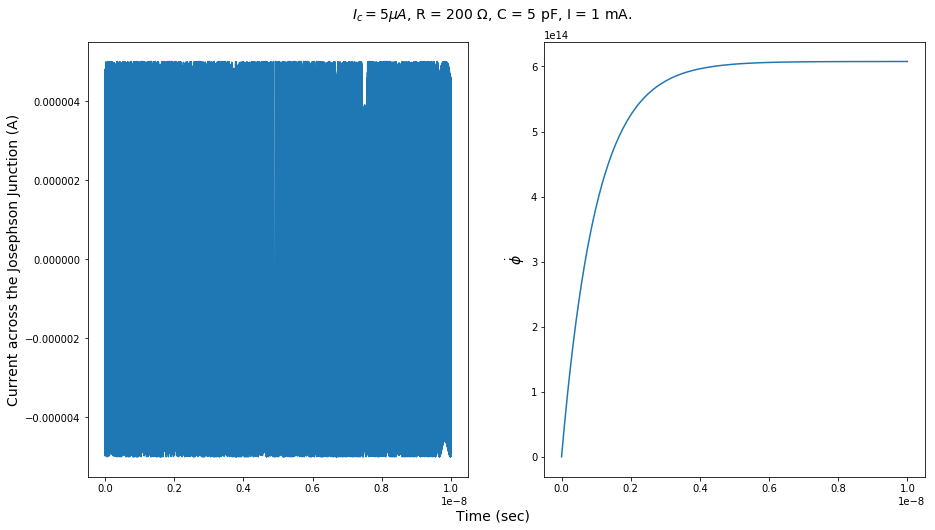

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 8))

ax1.plot(t, Ic*np.sin(phi[:,0]))
ax1.set_ylabel('Current across the Josephson Junction (A)', size = 14)

ax2.plot(t, phi[:, 1])
ax2.set_ylabel('$\dot{\phi}$', size = 14)
fig.text(0.5, 0.05, 'Time (sec)', ha = 'center', size = 14)
fig.text(0.5, 0.92, '$I_c = 5\mu A$, R = 200 $\Omega$, C = 5 pF, I = 1 mA.', ha='center', size = 14)
plt.show()

(0, 1e-11)

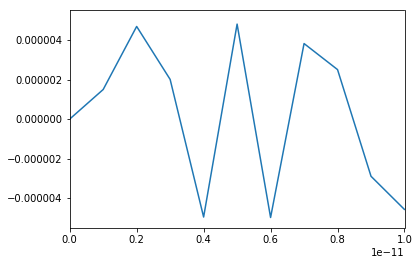

In [6]:
plt.plot(t, Ic*np.sin(phi[:,0]))
plt.xlim(0,10e-12)

In [7]:
t, phi = rk2([0, 0], 0 ,10e-12, 10e-15, jj)

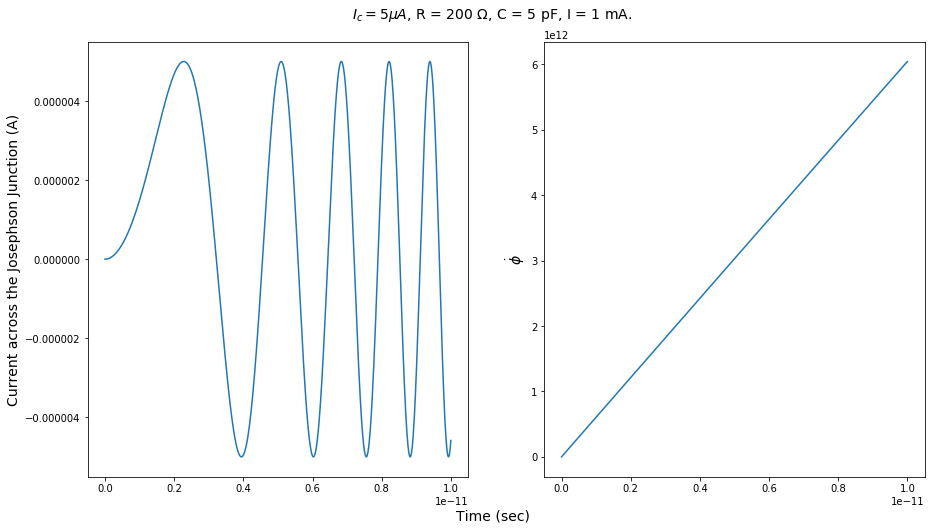

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 8))

ax1.plot(t, Ic*np.sin(phi[:,0]))
ax1.set_ylabel('Current across the Josephson Junction (A)', size = 14)

ax2.plot(t, phi[:, 1])
ax2.set_ylabel('$\dot{\phi}$', size = 14)

fig.text(0.5, 0.05, 'Time (sec)', ha = 'center', size = 14)
fig.text(0.5, 0.92, '$I_c = 5\mu A$, R = 200 $\Omega$, C = 5 pF, I = 1 mA.', ha='center', size = 14)
plt.show()

We see that the current plot is a lot smoother, but we would have to run this longer to see where phi dot would reach a constant value. 

# Finding $\dot{\phi}$
For this I just changed values until I got close enough. It's not elegant but it works.

First I changed the capacitence to see how that changed things. 

In [9]:
def jj_test(w, t):
    # w = [phi, dphi / dt]
    hbar = 1.0545718e-34 # (m^2 kg / s, or Js)
    e = 1.602176565e-19 # Electron charge (C)
    C = 5e-16 # Capacitence (F)
    Ic = 5e-6 # Critical current (A)
    R = 200 # Resistence (Ohm)
    I = 5e-3 # DC current applied (A)
    beta = 2 * e / (hbar*C)
    
    dpdt = w[1]
    
    ddpdt = (I - Ic*np.sin(w[0]) - w[1]*hbar /(2*e*R))*beta
    foo = np.array([dpdt, ddpdt])
    return foo

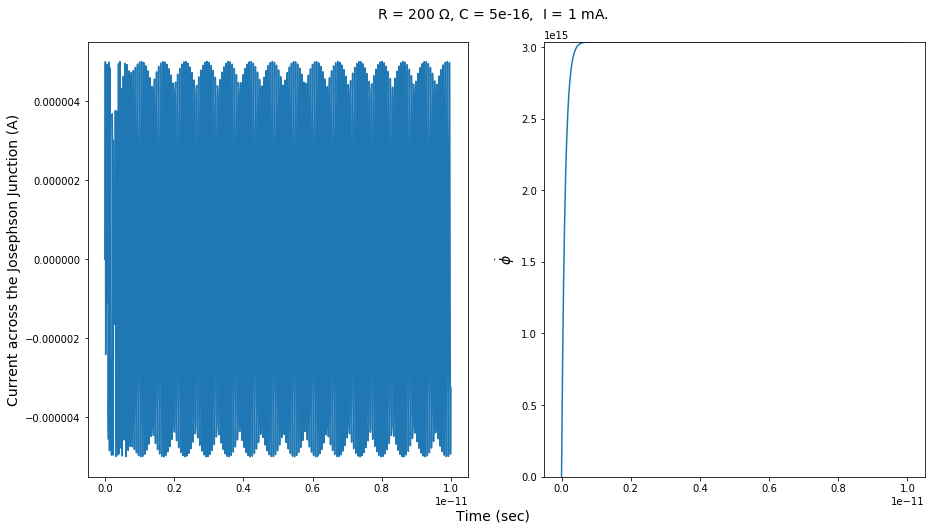

In [10]:
# C = 5e-16
t, phi = rk2([0, 0], 0 ,10e-12, 10e-15, jj_test)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 8))

ax1.plot(t, Ic*np.sin(phi[:,0]))
ax1.set_ylabel('Current across the Josephson Junction (A)', size = 14)

ax2.plot(t, phi[:, 1])
ax2.set_ylabel('$\dot{\phi}$', size = 14)
ax2.set_ylim(-10, 3038e12)

fig.text(0.5, 0.05, 'Time (sec)', ha = 'center', size = 14)
fig.text(0.5, 0.92, 'R = 200 $\Omega$, C = 5e-16,  I = 1 mA.', ha='center', size = 14)
plt.show()

It looks like we reach equilibruim really quick with smaller capacitence. This will be nice because that means I can run rk2 for a shorter tf to get my final answer, but it looks like we have some weird stuff going on in out current plot. I've set the uperbound on the y axis to be 3038 THz so that I can tell if we over or undershoot the desired angular frequency (Overshooting right now).

Now lets change the resistence, and the step size (just to be safe),

In [11]:
def jj_test(w, t):
    # w = [phi, dphi / dt]
    hbar = 1.0545718e-34 # (m^2 kg / s, or Js)
    e = 1.602176565e-19 # Electron charge (C)
    C = 5e-16 # Capacitence (F)
    Ic = 5e-6 # Critical current (A)
    R = 100 # Resistence (Ohm)
    I = 5e-3 # DC current applied (A)
    beta = 2 * e / (hbar*C)
    
    dpdt = w[1]
    
    ddpdt = (I - Ic*np.sin(w[0]) - w[1]*hbar /(2*e*R))*beta
    foo = np.array([dpdt, ddpdt])
    return foo

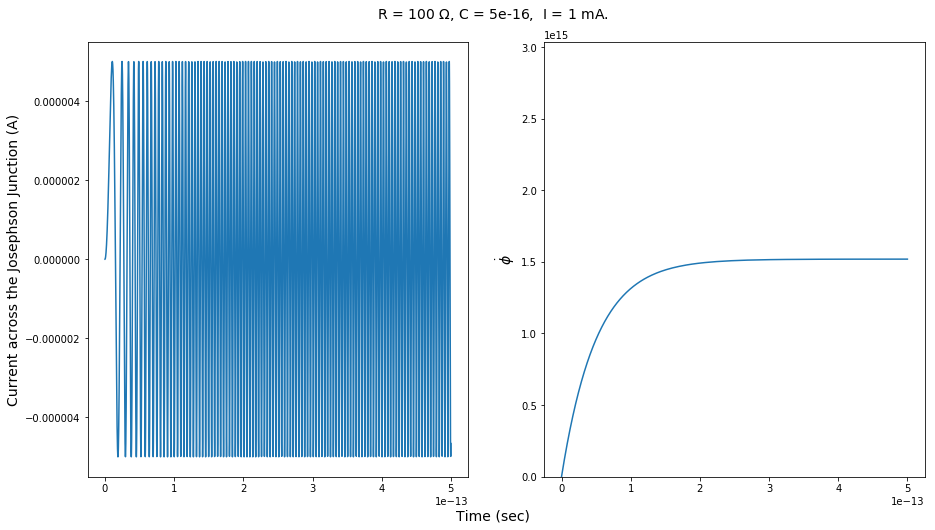

In [12]:
t, phi = rk2([0, 0], 0 ,0.5e-12, 10e-17, jj_test)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 8))

ax1.plot(t, Ic*np.sin(phi[:,0]))
ax1.set_ylabel('Current across the Josephson Junction (A)', size = 14)

ax2.plot(t, phi[:, 1])
ax2.set_ylabel('$\dot{\phi}$', size = 14)
ax2.set_ylim(0, 3038e12)

fig.text(0.5, 0.05, 'Time (sec)', ha = 'center', size = 14)
fig.text(0.5, 0.92, 'R = 100 $\Omega$, C = 5e-16,  I = 1 mA.', ha='center', size = 14)
plt.show()

Changing the resistence caused the angular frequency to plateau at a lower value. It looks like we could keep changing R till we get the right value but lets change the current just to see what happens. 

In [13]:
def jj_test(w, t):
    # w = [phi, dphi / dt]
    hbar = 1.0545718e-34 # (m^2 kg / s, or Js)
    e = 1.602176565e-19 # Electron charge (C)
    C = 5e-16 # Capacitence (F)
    Ic = 5e-6 # Critical current (A)
    R = 100 # Resistence (Ohm)
    I = 5e-1 # DC current applied (A)
    beta = 2 * e / (hbar*C)
    
    dpdt = w[1]
    
    ddpdt = (I - Ic*np.sin(w[0]) - w[1]*hbar /(2*e*R))*beta
    foo = np.array([dpdt, ddpdt])
    return foo

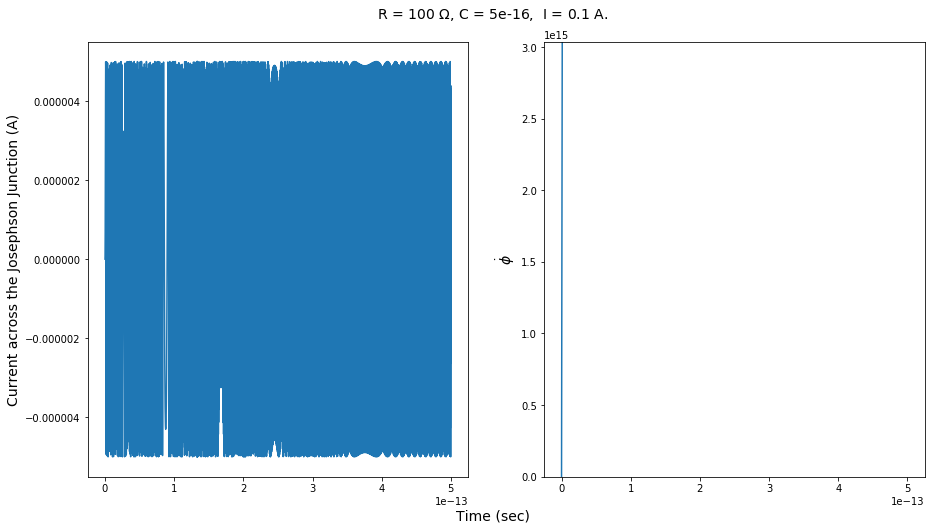

In [14]:
t, phi = rk2([0, 0], 0 ,0.5e-12, 10e-17, jj_test)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 8))

ax1.plot(t, Ic*np.sin(phi[:,0]))
ax1.set_ylabel('Current across the Josephson Junction (A)', size = 14)

ax2.plot(t, phi[:, 1])
ax2.set_ylabel('$\dot{\phi}$', size = 14)
ax2.set_ylim(0, 3038e12)

fig.text(0.5, 0.05, 'Time (sec)', ha = 'center', size = 14)
fig.text(0.5, 0.92, 'R = 100 $\Omega$, C = 5e-16,  I = 0.1 A.', ha='center', size = 14)
plt.show()

To no surprise making the current stronger makes the final phi dot larger. So now lets just change current and resistence till we get the value we want.

I'm not going to show every iteration of this, but I'm going to just adjust jj_test over and over until I get the end value I want. 

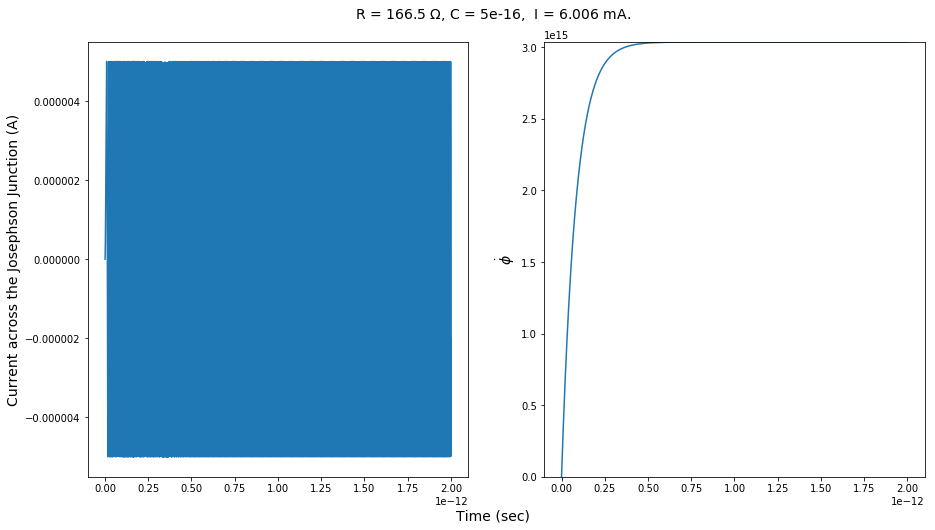

Final phi_dot is 3038.5409635657843 THz


In [15]:
def jj_test(w, t):
    # w = [phi, dphi / dt]
    hbar = 1.0545718e-34 # (m^2 kg / s, or Js)
    e = 1.602176565e-19 # Electron charge (C)
    
    C = 5e-16 # Capacitence (F)
    Ic = 5e-6 # Critical current (A)
    R = 166.5 # Resistence (Ohm)
    I = 6.006e-3 # DC current applied (A)
    beta = 2 * e / (hbar*C)
    
    dpdt = w[1]
    
    ddpdt = (I - Ic*np.sin(w[0]) - w[1]*hbar /(2*e*R))*beta
    foo = np.array([dpdt, ddpdt])
    return foo

t, phi = rk2([0, 0], 0 ,2e-12, 10e-17, jj_test)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 8))

ax1.plot(t, Ic*np.sin(phi[:,0]))
ax1.set_ylabel('Current across the Josephson Junction (A)', size = 14)

ax2.plot(t, phi[:, 1])
ax2.set_ylabel('$\dot{\phi}$', size = 14)
ax2.set_ylim(0, 3040e12)

fig.text(0.5, 0.05, 'Time (sec)', ha = 'center', size = 14)
fig.text(0.5, 0.92, 'R = 166.5 $\Omega$, C = 5e-16,  I = 6.006 mA.', ha='center', size = 14)
plt.show()

print('Final phi_dot is {} THz'.format(phi[-1,1]/(1e12)))

Look at equation 2, this corresponds to a Voltage of

In [16]:
hbar / (2*e) * phi[-1,1]

1.0000020232855247

About 1 Volt. This is how the Volt is defined. See the wiki page on the Volt for more info

https://en.wikipedia.org/wiki/Volt#Josephson_junction_definition

The wiki page will have a different frequency, that's because we've been using angular frequency, divide by a 2$\pi$ and you'll get the number they have on the wiki page.

In [17]:
3038.5409635657843 / (2*np.pi)

483.5988141387052